# PWM Generator

The PSLab's analog waveform generator can output arbitrary functions at frequencies up to 5 kHz. The PSLab can output square waves at much higher frequencies, up to 8 MHz. It can generate up to four such signals simultaneously with different phases and duty cycles, though they all share the same frequency. Such signals are often used to control peripheral devices such as motors using a technique called Pulse Width Modulation (PWM).

Let's start by generating a single square wave and looking at it through the oscilloscope. Connect SQ1 to CH1.

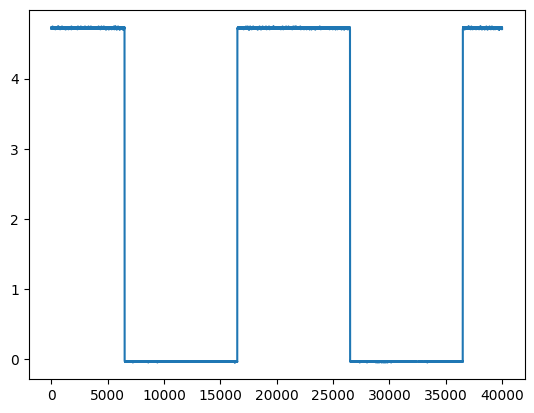

In [12]:
import matplotlib.pyplot as plt
import pslab
psl = pslab.ScienceLab()
psl.pwm_generator.generate(channels="SQ1", frequency=50, duty_cycles=0.5)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10000, timegap=4)
plt.plot(x, y)

The width of each pulse's on-period can be controlled with the `duty_cycles` parameter.

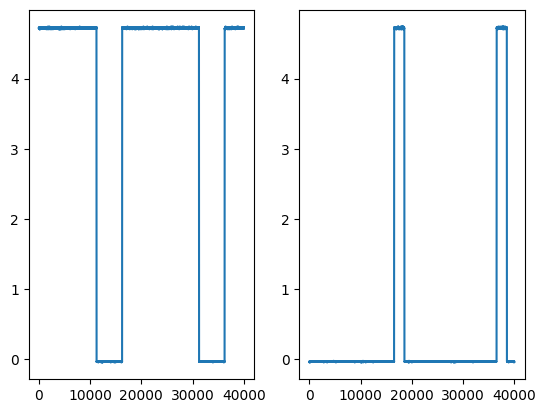

In [6]:
psl.pwm_generator.generate(channels="SQ1", frequency=50, duty_cycles=0.75)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10000, timegap=4)
plt.subplot(1, 2, 1)
plt.plot(x, y)

psl.pwm_generator.generate(channels="SQ1", frequency=50, duty_cycles=0.1)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10000, timegap=4)
plt.subplot(1, 2, 2)
plt.plot(x, y)

Let's add another channel. Connect SQ2 to CH2.

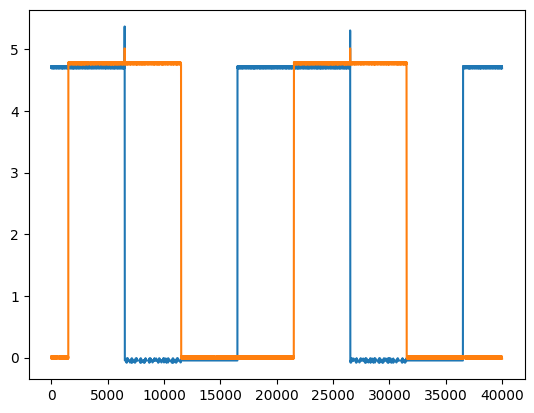

In [17]:
psl.pwm_generator.generate(channels=2, frequency=50, duty_cycles=0.5, phases=0.25)
x, y, z = psl.oscilloscope.capture(channels=2, samples=5000, timegap=8)
plt.plot(x, y, x, z)

Like the analog waveform generator, the PWM generator's output signals can be phase-shifted. Unlike the analog waveform generator, the phase shift is given as a ration between zero and one instead of degrees. The `phases` parameter takes either a single value, in which case each of the four output channels are offset from each other by that value, or a list of values with one value per output channel.

While the oscilloscope has four channels, only CH1 and CH2 has a range greater than the PWM generator's output. Therefore, we cannot use the oscilloscope to observe more than two of the PWM generator's channels at once. Another limitation of using the oscilloscope to look at digital signals is the limited bandwidth. Let's see what happens when we try to look at square waveforms with higher frequencies.

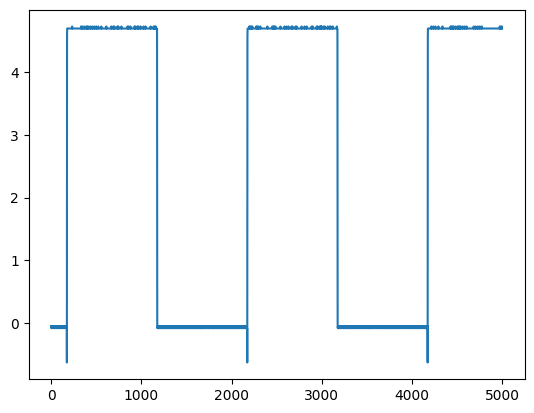

In [19]:
psl.pwm_generator.set_state(sq2=0) # Turn off SQ2.
psl.pwm_generator.generate(channels="SQ1", frequency=500, duty_cycles=0.5)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10000, timegap=0.5)
plt.plot(x, y)

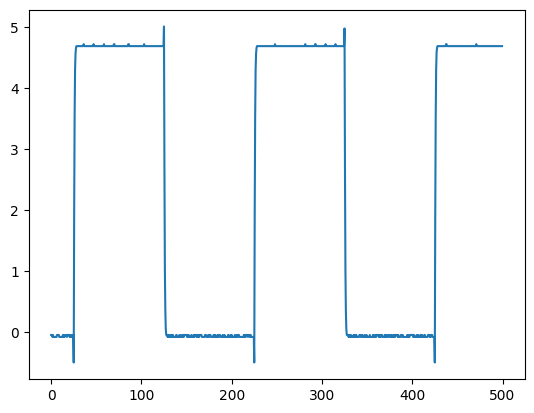

In [20]:
psl.pwm_generator.generate(channels="SQ1", frequency=5000, duty_cycles=0.5)
x, y = psl.oscilloscope.capture(channels="CH1", samples=1000, timegap=0.5)
plt.plot(x, y)

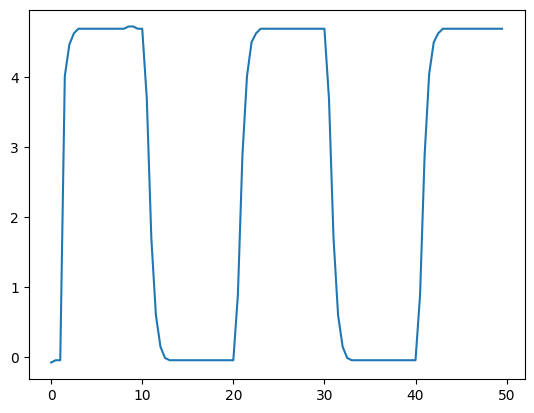

In [29]:
psl.pwm_generator.generate(channels="SQ1", frequency=50_000, duty_cycles=0.5)
x, y = psl.oscilloscope.capture(channels="CH1", samples=100, timegap=0.5)
plt.plot(x, y)

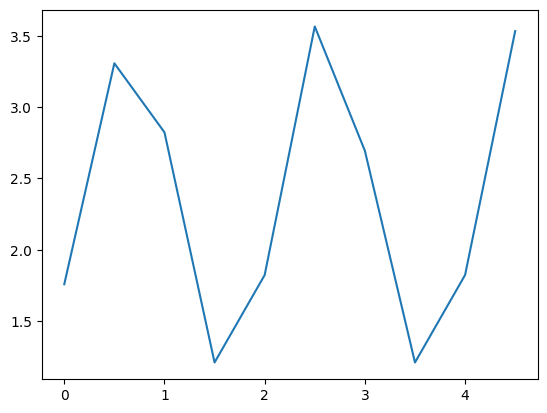

In [30]:
psl.pwm_generator.generate(channels="SQ1", frequency=500_000, duty_cycles=0.5)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10, timegap=0.5)
plt.plot(x, y)

Next, we'll take a look a better way to look at digital signals using the PSLab's logic analyzer.